In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar100


In [3]:
model_path = '/content/drive/MyDrive/models/cifar100_model_200.h5'
model = load_model(model_path)


In [4]:
(_, _), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Normalize pixel values
x_test = x_test.astype('float32') / 255.0
y_test = y_test.flatten()


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
num_images = 20
random_indices = np.random.choice(len(x_test), num_images, replace=False)
x_sample = x_test[random_indices]
y_sample = y_test[random_indices]


In [6]:
predictions = model.predict(x_sample)
predicted_labels = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


In [7]:
# CIFAR-100 fine labels
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
               'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
               'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
               'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
               'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
               'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
               'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
               'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
               'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
               'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
               'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
               'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
               'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
               'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
               'worm']


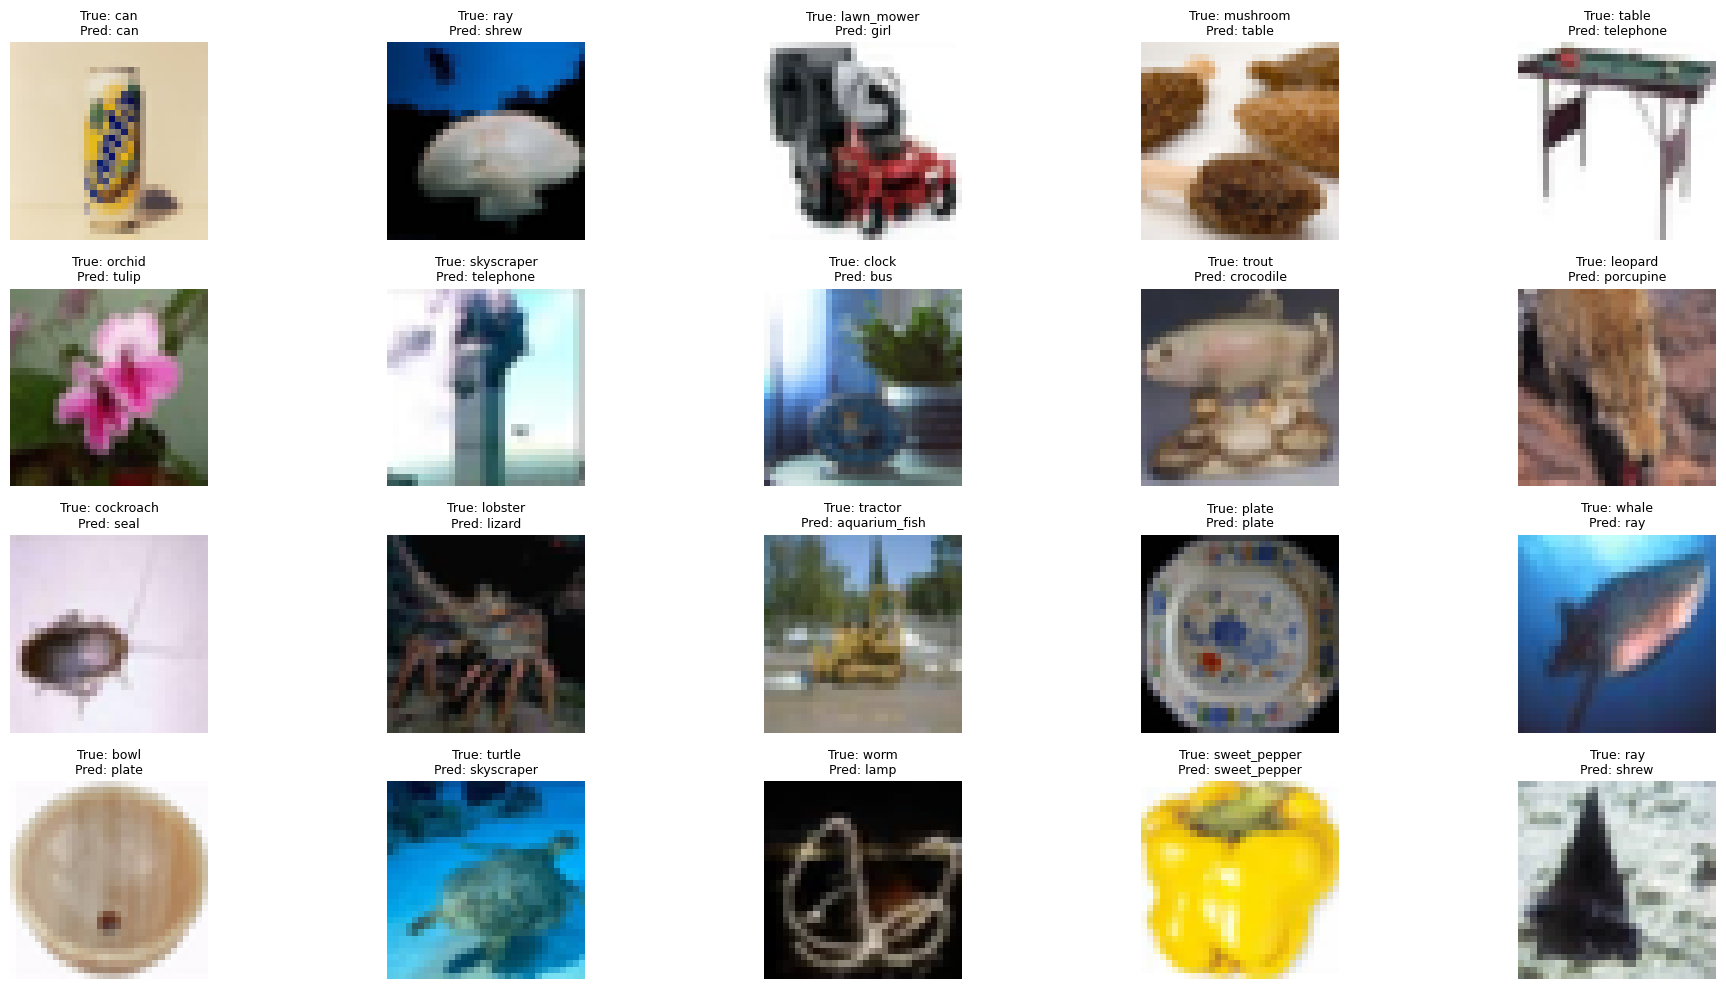

In [9]:
plt.figure(figsize=(20, 10))
for i in range(num_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_sample[i])
    true_label = class_names[y_sample[i]]
    pred_label = class_names[predicted_labels[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()
